# Cleaning up the dataset (task 5.2)

In [1]:
#used for visualizing the dataset
from matplotlib import pyplot
#implements classes to read and write tabular data in CSV format
import csv
#used for data science/data analysis and machine learning tasks
import pandas as pd
#performs a variety of mathematical operations on arrays
import numpy as np
# used to handle operations related to the calendar
import calendar
#provides us access to some common math functions and constants
import math

In [2]:
#Access the dataset 
vacdatasetlocnational = "data_2021-Nov-28.csv"
#set the columns name
vaccolNames = ['areaType','areaName','areaCode','date','UK daily total',
               'UK cumulative total','UK 1st dose daily','UK 1st dose total',
               'UK 2nd dose daily','UK 2nd dose total','UK Booster/3rd dose daily',
               'UK Booster/3rd dose total']
#read the dataset
fullVacDataset = pd.read_csv(vacdatasetlocnational,names=vaccolNames)
#create a dataframe
ddf = pd.DataFrame(fullVacDataset)
ddf

,areaType,areaName,areaCode,date,UK daily total,UK cumulative total,UK 1st dose daily,UK 1st dose total,UK 2nd dose daily,UK 2nd dose total,UK Booster/3rd dose daily,UK Booster/3rd dose total
0,overview,United Kingdom,K02000001,27/11/2021,504463.0,114809189,22304.0,50917949,31679.0,46309909,450480.0,17581331.0
1,overview,United Kingdom,K02000001,26/11/2021,394277.0,114304726,19933.0,50895645,23149.0,46278230,351195.0,17130851.0
2,overview,United Kingdom,K02000001,25/11/2021,442483.0,113910449,23579.0,50875712,22823.0,46255081,396081.0,16779656.0
3,overview,United Kingdom,K02000001,24/11/2021,426964.0,113467966,24579.0,50852133,23439.0,46232258,378946.0,16383575.0
4,overview,United Kingdom,K02000001,23/11/2021,413976.0,113041002,26822.0,50827554,22002.0,46208819,365152.0,16004629.0
...,...,...,...,...,...,...,...,...,...,...,...,...
317,overview,United Kingdom,K02000001,14/01/2021,321951.0,3678180,316694.0,3234946,5257.0,443234,NaN,NaN
318,overview,United Kingdom,K02000001,13/01/2021,288688.0,3356229,278943.0,2918252,9745.0,437977,NaN,NaN
319,overview,United Kingdom,K02000001,12/01/2021,223726.0,3067541,207661.0,2639309,16065.0,428232,NaN,NaN
320,overview,United Kingdom,K02000001,11/01/2021,165844.0,2843815,145076.0,2431648,20768.0,412167,NaN,NaN


In [3]:
#Cleaning the Vaccination Dataset
#deleting the "area Type","area Name" and "area Code" column
ddf = ddf.drop(['areaType','areaName','areaCode'], axis = 'columns')

#rearranging the columns 
ddf = ddf.reindex(columns=['date','UK 1st dose daily','UK 2nd dose daily',
                           'UK Booster/3rd dose daily','UK daily total',
                           'UK 1st dose total','UK 2nd dose total',
                           'UK Booster/3rd dose total','UK cumulative total'])

### Dataset numerical description (task 3)

#### Each column numerical description

In [4]:
#Describe a column
def describe_col(col):
    #how many rows  the column contains 
    print(len(ddf[col]))
    #date and the mininum value of the column
    print(ddf['date'][ddf.index[ddf[col]==ddf[col].min()].values[0]], ddf[col].min())
    #date and the maximum value of the column
    print(ddf['date'][ddf.index[ddf[col]==ddf[col].max()].values[0]], ddf[col].max())
    #mean of the column
    print("%.2f" % round(ddf[col].mean(), 2))

describe_col('UK 1st dose daily')

322
19/09/2021 13840.0
20/03/2021 752308.0
151499.62


In [5]:
describe_col('UK 2nd dose daily')

322
24/01/2021 818.0
22/05/2021 556951.0
143048.32


In [6]:
describe_col('UK Booster/3rd dose daily')

322
03/10/2021 89518.0
30/09/2021 868202.0
287956.17


#### Cleaning the dataset (task 5.2)

In [7]:
#Cheking the empty cells
nan_data = ddf.isna()
nan_data

,date,UK 1st dose daily,UK 2nd dose daily,UK Booster/3rd dose daily,UK daily total,UK 1st dose total,UK 2nd dose total,UK Booster/3rd dose total,UK cumulative total
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
317,False,False,False,True,False,False,False,True,False
318,False,False,False,True,False,False,False,True,False
319,False,False,False,True,False,False,False,True,False
320,False,False,False,True,False,False,False,True,False


In [8]:
#select the rows with empty data
nan_data_df = ddf[ddf.isna().any(axis=True)]
nan_data_df

,date,UK 1st dose daily,UK 2nd dose daily,UK Booster/3rd dose daily,UK daily total,UK 1st dose total,UK 2nd dose total,UK Booster/3rd dose total,UK cumulative total
59,29/09/2021,31539.0,34093.0,NaN,65632.0,48829118,44867373,NaN,93696491
60,28/09/2021,31853.0,33532.0,NaN,65385.0,48797579,44833280,NaN,93630859
61,27/09/2021,24919.0,33177.0,NaN,58096.0,48765726,44799748,NaN,93565474
62,26/09/2021,15984.0,25539.0,NaN,41523.0,48740807,44766571,NaN,93507378
63,25/09/2021,24296.0,47118.0,NaN,71414.0,48724823,44741032,NaN,93465855
...,...,...,...,...,...,...,...,...,...
317,14/01/2021,316694.0,5257.0,NaN,321951.0,3234946,443234,NaN,3678180
318,13/01/2021,278943.0,9745.0,NaN,288688.0,2918252,437977,NaN,3356229
319,12/01/2021,207661.0,16065.0,NaN,223726.0,2639309,428232,NaN,3067541
320,11/01/2021,145076.0,20768.0,NaN,165844.0,2431648,412167,NaN,2843815


In [9]:
#completing the missing data
#select the "UK Booster dose daily column" & "UK Booster/3rd dose total"
selection = ddf['UK Booster/3rd dose daily']
selection2 = ddf['UK Booster/3rd dose total']

#print the number of empty rows
#print("Number of empty rows for the 'UK Booster/3rd dose daily' column:")
print(selection.isnull().sum())
#print("Number of empty rows for the 'UK Booster/3rd dose total' column:")
print(selection2.isnull().sum())

263
263


In [10]:
#function to replace the missing data
def replaceData(column):
    i = int(0)
    #itterating though every cell of the selected column
    while i < len(ddf[column]):
        #checking if the cell is empty or has the value NaN
        if pd.isna(ddf[column].values[i]):
            #replacing the cell's value with 0(zero)
            ddf[column].values[i] = int(0)
        i += 1

#replacing the missing values for the "UK Booster/3rd dose daily" column      
replaceData('UK Booster/3rd dose daily')
#replacing the missing values for the "UK Booster/3rd dose total0" column 
replaceData('UK Booster/3rd dose total')

In [11]:
#checking the empty cells 
nan_data_df = ddf[ddf.isna().any(axis=True)]
nan_data_df

,date,UK 1st dose daily,UK 2nd dose daily,UK Booster/3rd dose daily,UK daily total,UK 1st dose total,UK 2nd dose total,UK Booster/3rd dose total,UK cumulative total
321,10/01/2021,NaN,NaN,0.0,NaN,2286572,391399,0.0,2677971


In [12]:
#complete the remaining empty cells
ddf['UK 1st dose daily'].loc[321] = ddf['UK 1st dose total'].loc[321]
ddf['UK 2nd dose daily'].loc[321] = ddf['UK 2nd dose total'].loc[321]
ddf['UK daily total'].loc[321] = ddf['UK 1st dose daily'].loc[321]+ddf['UK 2nd dose daily'].loc[321]

c:\users\dave\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
#checking the empty cells 
nan_data_df = ddf[ddf.isna().any(axis=True)]
nan_data_df

,date,UK 1st dose daily,UK 2nd dose daily,UK Booster/3rd dose daily,UK daily total,UK 1st dose total,UK 2nd dose total,UK Booster/3rd dose total,UK cumulative total


#### Adding the cases column to the dataset

In [14]:
#Access the dataset 
casesdataset = "cases_2021-Nov-27.csv"
#set the columns name
casescolNames = ['areaType','areaName','areaCode','date','UK Cases daily', 'UK Cases total']
#read the dataset
casesDataset = pd.read_csv(casesdataset, names = casescolNames)
#create a dataframe
temp_df = pd.DataFrame(casesDataset)
temp_df

,areaType,areaName,areaCode,date,UK Cases daily,UK Cases total
0,overview,United Kingdom,K02000001,2021-11-27,39567,10110408
1,overview,United Kingdom,K02000001,2021-11-26,50091,10070841
2,overview,United Kingdom,K02000001,2021-11-25,47240,10021497
3,overview,United Kingdom,K02000001,2021-11-24,43676,9974843
4,overview,United Kingdom,K02000001,2021-11-23,42484,9932408
...,...,...,...,...,...,...
317,overview,United Kingdom,K02000001,2021-01-14,48682,3260258
318,overview,United Kingdom,K02000001,2021-01-13,47525,3211576
319,overview,United Kingdom,K02000001,2021-01-12,45533,3164051
320,overview,United Kingdom,K02000001,2021-01-11,46169,3118518


In [15]:
#add the "UK Cases daily" to the dataset
ddf.insert(9, "UK Cases daily", temp_df['UK Cases daily'], True)
#add the "UK Cases total" to the dataset
ddf.insert(10, "UK Cases total", temp_df['UK Cases total'], True)
#ddf.head()

In [16]:
ddf.head()

,date,UK 1st dose daily,UK 2nd dose daily,UK Booster/3rd dose daily,UK daily total,UK 1st dose total,UK 2nd dose total,UK Booster/3rd dose total,UK cumulative total,UK Cases daily,UK Cases total
0,27/11/2021,22304.0,31679.0,450480.0,504463.0,50917949,46309909,17581331.0,114809189,39567,10110408
1,26/11/2021,19933.0,23149.0,351195.0,394277.0,50895645,46278230,17130851.0,114304726,50091,10070841
2,25/11/2021,23579.0,22823.0,396081.0,442483.0,50875712,46255081,16779656.0,113910449,47240,10021497
3,24/11/2021,24579.0,23439.0,378946.0,426964.0,50852133,46232258,16383575.0,113467966,43676,9974843
4,23/11/2021,26822.0,22002.0,365152.0,413976.0,50827554,46208819,16004629.0,113041002,42484,9932408


In [17]:
#checking the empty cells after adding the cases column
nan_data_df = ddf[ddf.isna().any(axis=True)]
nan_data_df

,date,UK 1st dose daily,UK 2nd dose daily,UK Booster/3rd dose daily,UK daily total,UK 1st dose total,UK 2nd dose total,UK Booster/3rd dose total,UK cumulative total,UK Cases daily,UK Cases total


In [18]:
#saving the csv to a new file
ddf.to_csv('UK_Total_Vaccination_Dataset.csv')

## Data visualisation

### Dose of the vaccine by month

In [19]:
#Create a new "Month" numerical column
ddf.insert(0, "Month", np.nan, True)
ddf.head()

,Month,date,UK 1st dose daily,UK 2nd dose daily,UK Booster/3rd dose daily,UK daily total,UK 1st dose total,UK 2nd dose total,UK Booster/3rd dose total,UK cumulative total,UK Cases daily,UK Cases total
0,NaN,27/11/2021,22304.0,31679.0,450480.0,504463.0,50917949,46309909,17581331.0,114809189,39567,10110408
1,NaN,26/11/2021,19933.0,23149.0,351195.0,394277.0,50895645,46278230,17130851.0,114304726,50091,10070841
2,NaN,25/11/2021,23579.0,22823.0,396081.0,442483.0,50875712,46255081,16779656.0,113910449,47240,10021497
3,NaN,24/11/2021,24579.0,23439.0,378946.0,426964.0,50852133,46232258,16383575.0,113467966,43676,9974843
4,NaN,23/11/2021,26822.0,22002.0,365152.0,413976.0,50827554,46208819,16004629.0,113041002,42484,9932408


In [20]:
#selecting the month from the "date" column
ddf['Month'] = ddf['date'].str[3:5]
#converting the type of the variable for the "Month" column
ddf['Month'] = ddf['Month'].astype('int32')
ddf.head()

,Month,date,UK 1st dose daily,UK 2nd dose daily,UK Booster/3rd dose daily,UK daily total,UK 1st dose total,UK 2nd dose total,UK Booster/3rd dose total,UK cumulative total,UK Cases daily,UK Cases total
0,11,27/11/2021,22304.0,31679.0,450480.0,504463.0,50917949,46309909,17581331.0,114809189,39567,10110408
1,11,26/11/2021,19933.0,23149.0,351195.0,394277.0,50895645,46278230,17130851.0,114304726,50091,10070841
2,11,25/11/2021,23579.0,22823.0,396081.0,442483.0,50875712,46255081,16779656.0,113910449,47240,10021497
3,11,24/11/2021,24579.0,23439.0,378946.0,426964.0,50852133,46232258,16383575.0,113467966,43676,9974843
4,11,23/11/2021,26822.0,22002.0,365152.0,413976.0,50827554,46208819,16004629.0,113041002,42484,9932408


In [21]:
#Group the vaccine numbers by month
ddf.groupby('Month').sum()

,UK 1st dose daily,UK 2nd dose daily,UK Booster/3rd dose daily,UK daily total,UK 1st dose total,UK 2nd dose total,UK Booster/3rd dose total,UK cumulative total,UK Cases daily,UK Cases total
Month,,,,,,,,,,
1,9296367.0,494209.0,0.0,9790576.0,119081094,10086927,0.0,129168021,799772,76898932
2,10979084.0,321607.0,0.0,11300691.0,426493831,16482586,0.0,442976417,359380,112881786
3,10871993.0,3697642.0,0.0,14569635.0,796985058,64689089,0.0,861674147,170264,132310463
4,3214761.0,10443855.0,0.0,13658616.0,981553958,281854965,0.0,1263408923,78695,131500537
5,5114953.0,10777406.0,0.0,15892359.0,1141131328,631832265,0.0,1772963593,77731,137945861
6,5383820.0,7313480.0,0.0,12697300.0,1266471926,905384098,0.0,2171856024,319155,138157602
7,1955404.0,5273972.0,0.0,7229376.0,1429354980,1108108884,0.0,2537463864,1072943,165543949
8,1271526.0,4587816.0,0.0,5859342.0,1470190587,1264773235,0.0,2734963822,942392,195717880
9,775582.0,1991845.0,868202.0,2767427.0,1455249107,1324898300,868202.0,2781015609,1034921,219772283


In [22]:
#convert everything to type int32
ddf['UK 1st dose daily'] = ddf['UK 1st dose daily'].astype('int32')
ddf['UK 2nd dose daily'] = ddf['UK 2nd dose daily'].astype('int32')
ddf['UK Booster/3rd dose daily'] = ddf['UK Booster/3rd dose daily'].astype('int32')
ddf['UK daily total'] = ddf['UK daily total'].astype('int32')
ddf['UK 1st dose total'] = ddf['UK 1st dose total'].astype('int32')
ddf['UK 2nd dose total'] = ddf['UK 2nd dose total'].astype('int32')
ddf['UK Booster/3rd dose total'] = ddf['UK Booster/3rd dose total'].astype('int32')
ddf['UK cumulative total'] = ddf['UK daily total'].astype('int32')
ddf.head()

,Month,date,UK 1st dose daily,UK 2nd dose daily,UK Booster/3rd dose daily,UK daily total,UK 1st dose total,UK 2nd dose total,UK Booster/3rd dose total,UK cumulative total,UK Cases daily,UK Cases total
0,11,27/11/2021,22304,31679,450480,504463,50917949,46309909,17581331,504463,39567,10110408
1,11,26/11/2021,19933,23149,351195,394277,50895645,46278230,17130851,394277,50091,10070841
2,11,25/11/2021,23579,22823,396081,442483,50875712,46255081,16779656,442483,47240,10021497
3,11,24/11/2021,24579,23439,378946,426964,50852133,46232258,16383575,426964,43676,9974843
4,11,23/11/2021,26822,22002,365152,413976,50827554,46208819,16004629,413976,42484,9932408


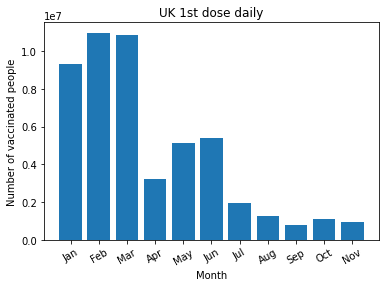

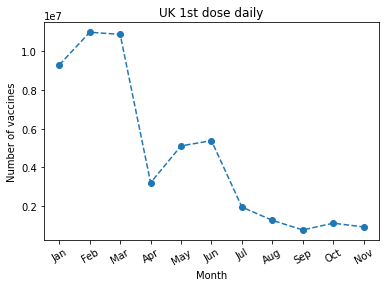

In [23]:
def vacc_by_month_bar(vaccinedose):
    months = range(1,12)
    results = ddf.groupby('Month').sum()
    #set the bars for the plot
    pyplot.bar(months, results[vaccinedose])
    #create the months list for the x coordinates
    xticks = []
    for x in months:
        xticks.append(calendar.month_abbr[x])
    pyplot.xticks(months, xticks, rotation=30)
    #put the y label
    pyplot.ylabel('Number of vaccinated people')
    #put the x label
    pyplot.xlabel('Month')
    #set the title
    pyplot.title(vaccinedose)
    #show the plot
    pyplot.show()
    
    
def vacc_by_month_line(vaccinedose):
    months = range(1,12)
    results = ddf.groupby('Month').sum()
    #set the bars for the plot
    pyplot.plot(months, results[vaccinedose], linestyle='dashed', marker = 'o')
    #create the months list for the x coordinates
    xticks = []
    for x in months:
        xticks.append(calendar.month_abbr[x])
    pyplot.xticks(months, xticks, rotation=30)
    #put the y label
    pyplot.ylabel('Number of vaccines')
    #put the x label
    pyplot.xlabel('Month')
    #set the title
    pyplot.title(vaccinedose)
    #show the plot
    pyplot.show()
    
    
vacc_by_month_bar('UK 1st dose daily')
vacc_by_month_line('UK 1st dose daily')


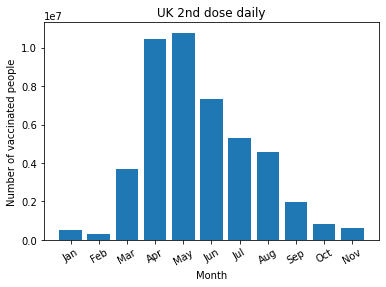

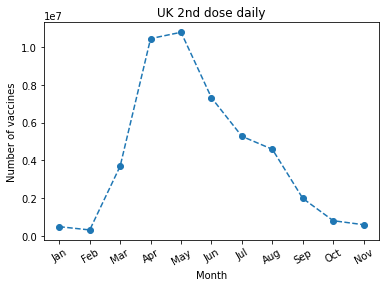

In [24]:
vacc_by_month_bar('UK 2nd dose daily')
vacc_by_month_line('UK 2nd dose daily')

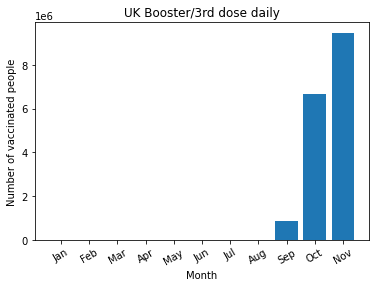

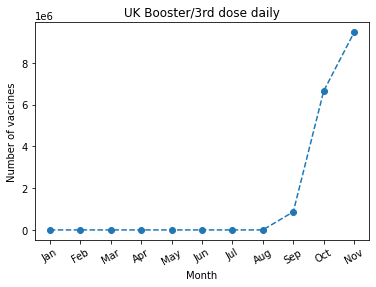

In [25]:
vacc_by_month_bar('UK Booster/3rd dose daily')
vacc_by_month_line('UK Booster/3rd dose daily')

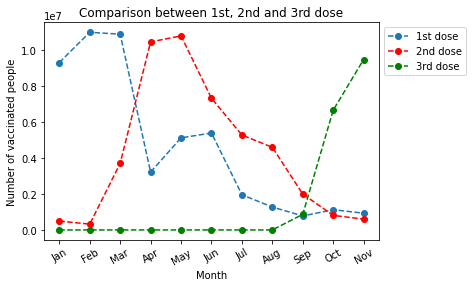

In [26]:
#compare the doses of the vaccine
def vacc_by_month_line_compare(vaccinedose1,vaccinedose2,vaccinedose3):
    months = range(1,12)
    results = ddf.groupby('Month').sum()
    #set the bars for the 1st plot
    pyplot.plot(months, results[vaccinedose1],label = '1st dose', linestyle='dashed', marker = 'o')
    #set the bars for the 2nd plot
    pyplot.plot(months, results[vaccinedose2],label = '2nd dose',color='red', linestyle='dashed', marker = 'o')
    #set the bars for the 3rd plot
    pyplot.plot(months, results[vaccinedose3],label = '3rd dose',color='green', linestyle='dashed', marker = 'o')
    pyplot.legend(bbox_to_anchor=(1, 1))
    #create the months list for the x coordinates
    xticks = []
    for x in months:
        xticks.append(calendar.month_abbr[x])
    pyplot.xticks(months, xticks, rotation=30)
    #put the y label
    pyplot.ylabel('Number of vaccinated people')
    #put the x label
    pyplot.xlabel('Month')
    #set the title
    pyplot.title('Comparison between 1st, 2nd and 3rd dose')
    #show the plot
    pyplot.show()
    
vacc_by_month_line_compare('UK 1st dose daily','UK 2nd dose daily','UK Booster/3rd dose daily')

In [27]:
ddf.head()

,Month,date,UK 1st dose daily,UK 2nd dose daily,UK Booster/3rd dose daily,UK daily total,UK 1st dose total,UK 2nd dose total,UK Booster/3rd dose total,UK cumulative total,UK Cases daily,UK Cases total
0,11,27/11/2021,22304,31679,450480,504463,50917949,46309909,17581331,504463,39567,10110408
1,11,26/11/2021,19933,23149,351195,394277,50895645,46278230,17130851,394277,50091,10070841
2,11,25/11/2021,23579,22823,396081,442483,50875712,46255081,16779656,442483,47240,10021497
3,11,24/11/2021,24579,23439,378946,426964,50852133,46232258,16383575,426964,43676,9974843
4,11,23/11/2021,26822,22002,365152,413976,50827554,46208819,16004629,413976,42484,9932408


### Number of cases by month

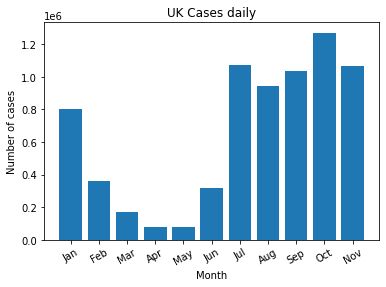

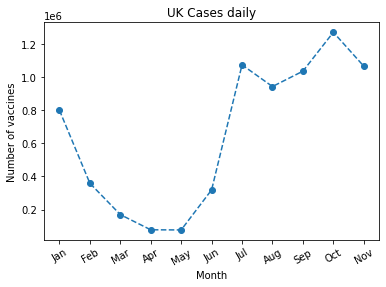

In [28]:
def cases_by_month_bar(title):
    months = range(1,12)
    results = ddf.groupby('Month').sum()
    #set the bars for the plot
    pyplot.bar(months, results[title])
    #create the months list for the x coordinates
    xticks = []
    for x in months:
        xticks.append(calendar.month_abbr[x])
    pyplot.xticks(months, xticks, rotation=30)
    #put the y label
    pyplot.ylabel('Number of cases')
    #put the x label
    pyplot.xlabel('Month')
    #set the title
    pyplot.title(title)
    #show the plot
    pyplot.show()
    
    
def cases_by_month_line(title):
    months = range(1,12)
    results = ddf.groupby('Month').sum()
    #set the bars for the plot
    pyplot.plot(months, results[title], linestyle='dashed', marker = 'o')
    #create the months list for the x coordinates
    xticks = []
    for x in months:
        xticks.append(calendar.month_abbr[x])
    pyplot.xticks(months, xticks, rotation=30)
    #put the y label
    pyplot.ylabel('Number of cases')
    #put the x label
    pyplot.xlabel('Month')
    #set the title
    pyplot.title(title)
    #show the plot
    pyplot.show()
    
    
cases_by_month_bar('UK Cases daily')
vacc_by_month_line('UK Cases daily')


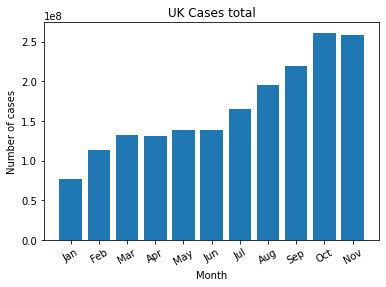

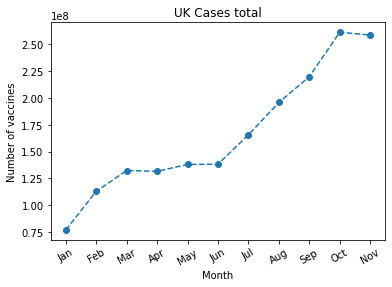

In [29]:
cases_by_month_bar('UK Cases total')
vacc_by_month_line('UK Cases total')

### Dose of vaccine by day

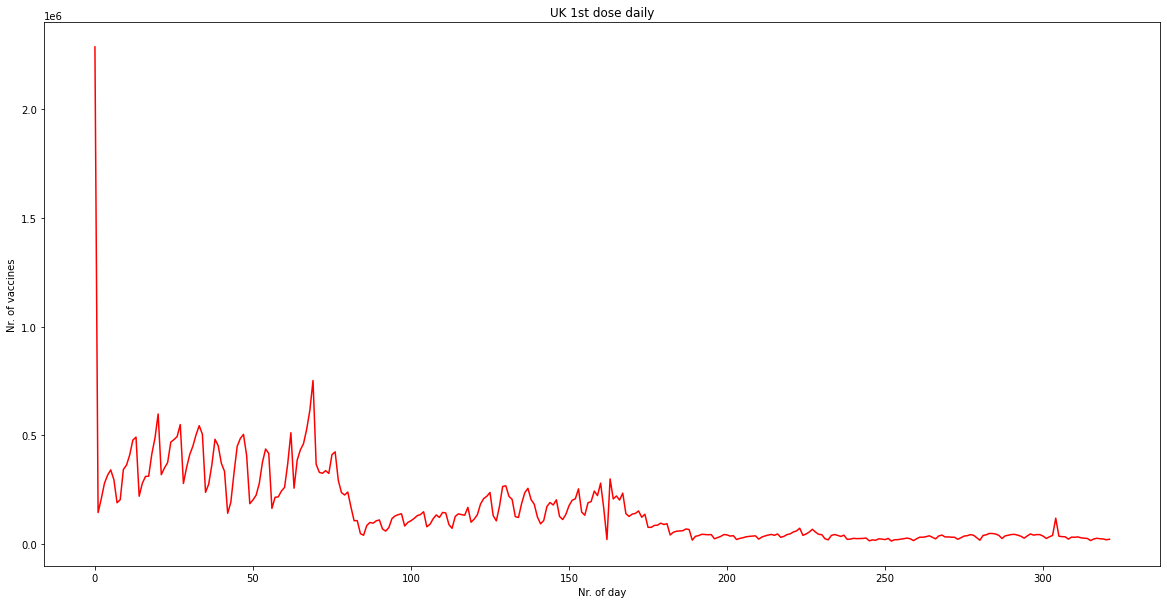

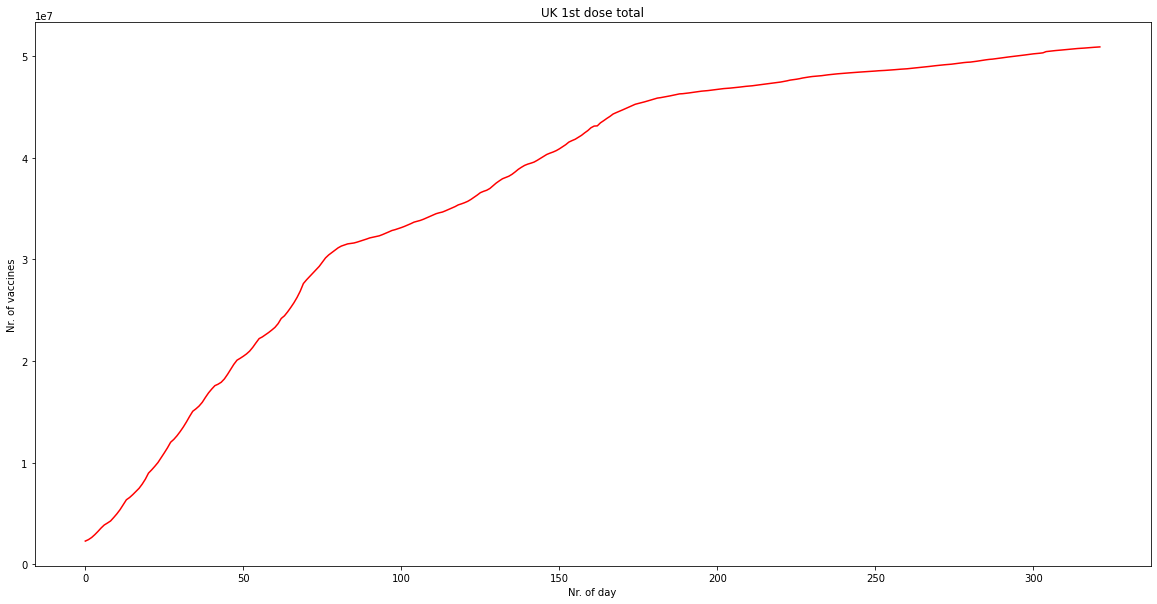

In [30]:
def vacc_by_day(column):
    #setting the dimensions of the graph
    pyplot.figure(figsize=(20,10))
    pyplot.title(column)
    #setting the x label
    pyplot.xlabel('Nr. of day')
    #setting the y label
    pyplot.ylabel('Nr. of vaccines')
    #plotting the graph by day
    pyplot.plot(np.arange(0,322), ddf[column].iloc[::-1], c = 'red', linestyle='solid')
    #showing the graph
    pyplot.show()
    
vacc_by_day('UK 1st dose daily')
vacc_by_day('UK 1st dose total')


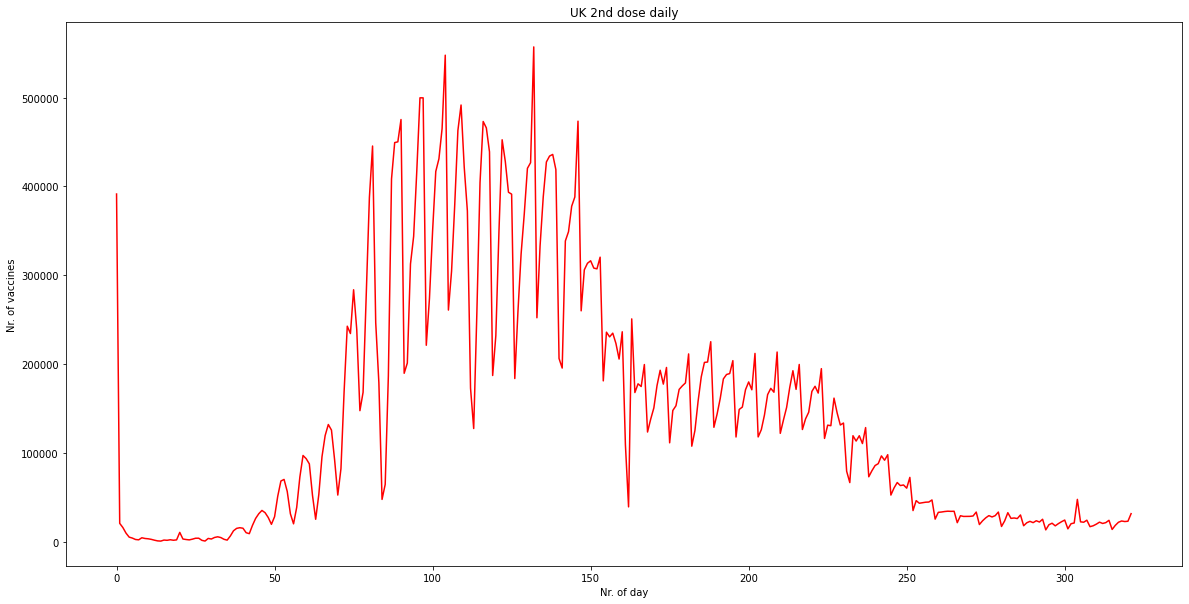

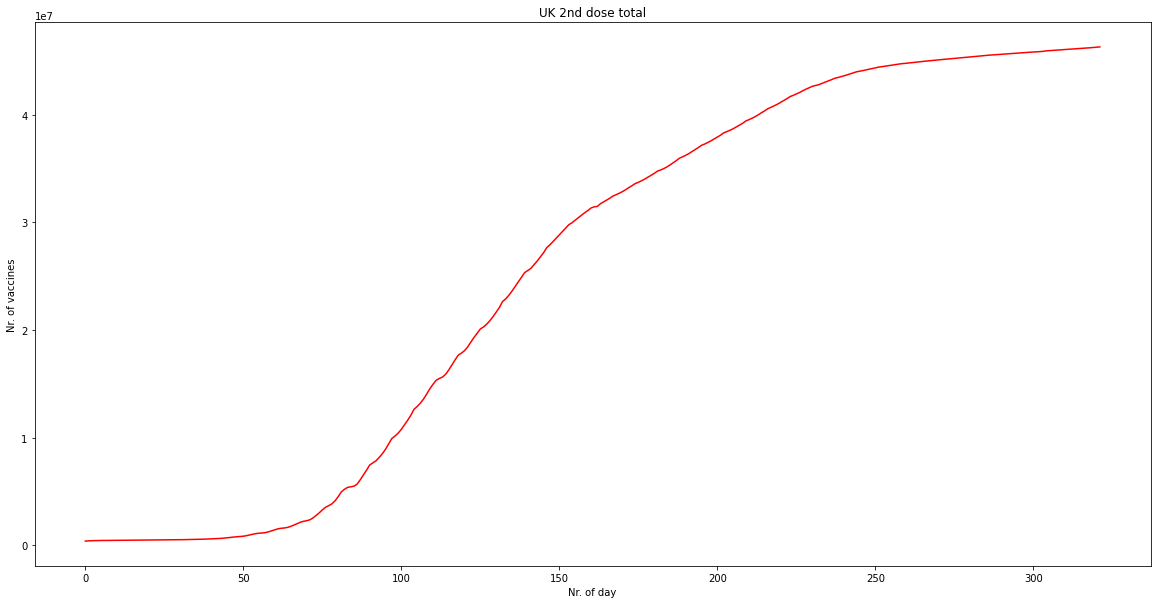

In [31]:
vacc_by_day('UK 2nd dose daily')
vacc_by_day('UK 2nd dose total')

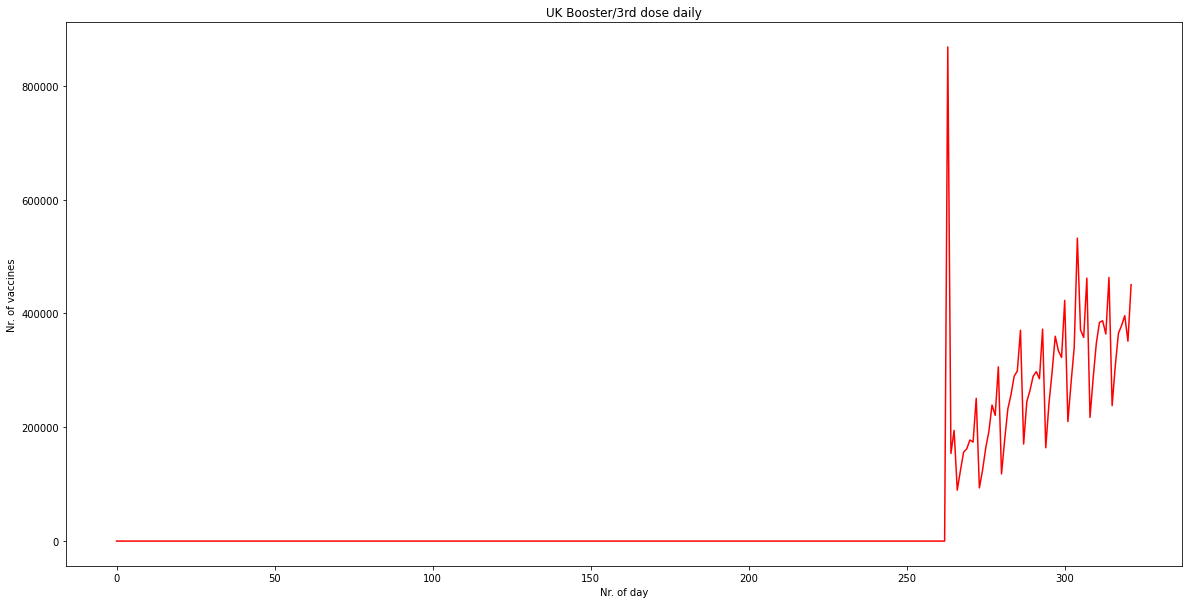

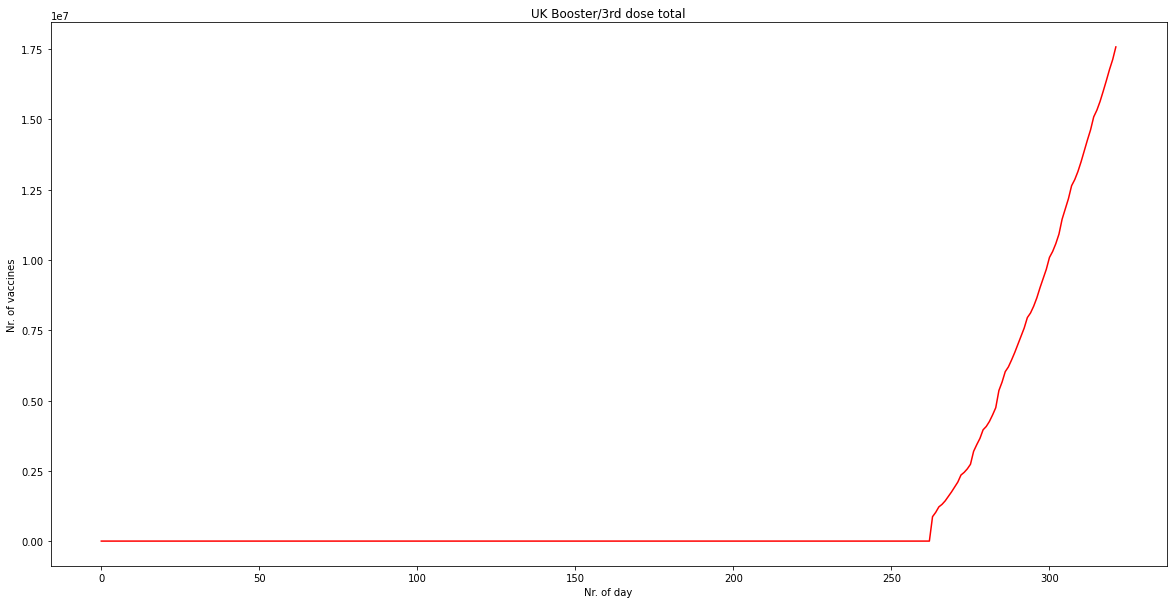

In [32]:
vacc_by_day('UK Booster/3rd dose daily')
vacc_by_day('UK Booster/3rd dose total')

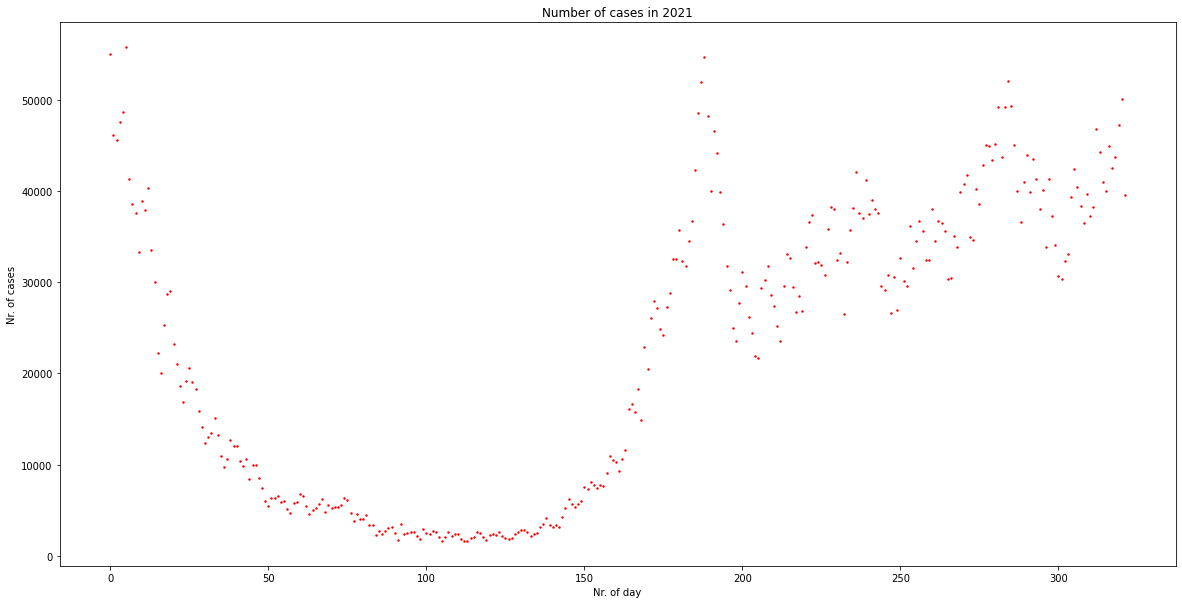

In [33]:
#plot the cases of COVID based on their date

#set the dimensions of the graph
pyplot.figure(figsize=(20,10))
#set the tile 
pyplot.title('Number of cases in 2021')
#set the x label
pyplot.xlabel('Nr. of day')
#set the y label
pyplot.ylabel('Nr. of cases')
#plot the graph 
#reverse the columns as the dataset starts backwards chronologically
pyplot.scatter(np.arange(0,322), ddf['UK Cases daily'].iloc[::-1], s=2, c = 'red',)
#show the plot
pyplot.show()

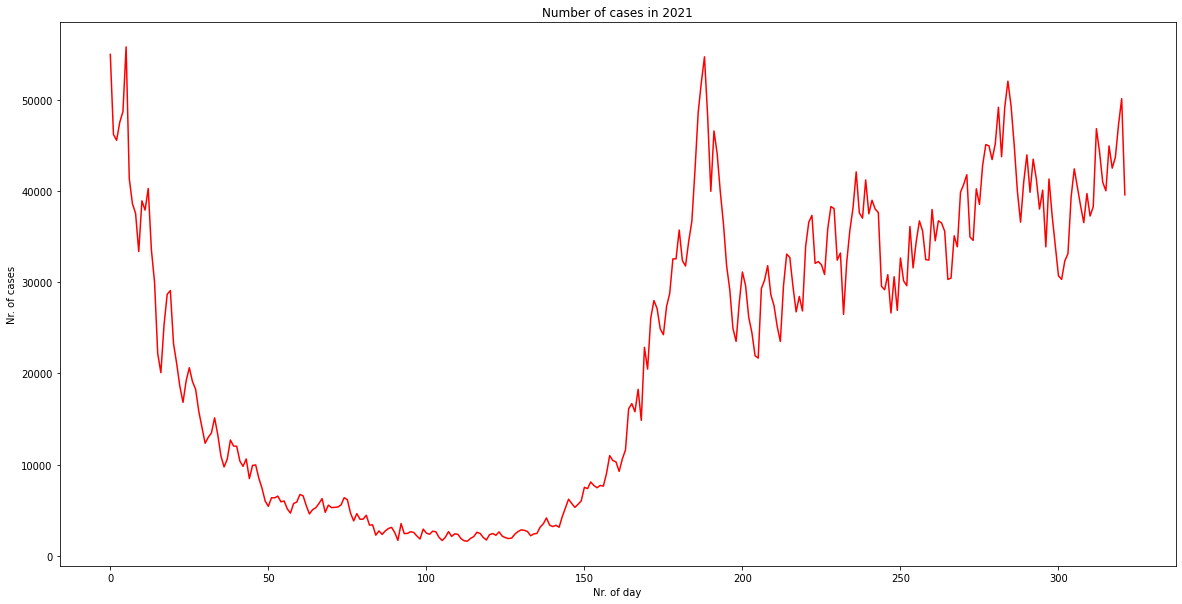

In [34]:
#set the dimensions of the graph
pyplot.figure(figsize=(20,10))
#set the tile 
pyplot.title('Number of cases in 2021')
#set the x label
pyplot.xlabel('Nr. of day')
#set the y label
pyplot.ylabel('Nr. of cases')
#plot the graph 
#reverse the columns as the dataset starts backwards chronologically
pyplot.plot(np.arange(0,322), ddf['UK Cases daily'].iloc[::-1], c = 'red', linestyle='solid')
#show the plot
pyplot.show()

# Linear regression

In [35]:
#import the libraries
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


# Simple linear regression for 1st dose of the vaccine

Estimated coefficients:
b_0 = 599171.9461891218            
b_1 = -2797.952058541824


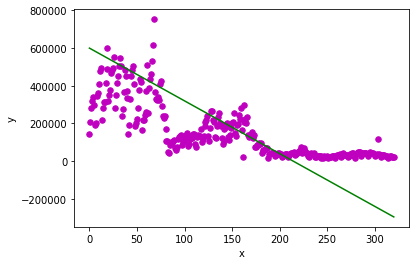

In [36]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)

def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    pyplot.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    pyplot.plot(x, y_pred, color = "g")
 
    # putting labels
    pyplot.xlabel('x')
    pyplot.ylabel('y')
 
    # function to show plot
    pyplot.show()
def main(x, y):
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)

x = np.arange(0,321)
y = ddf['UK 1st dose daily'].iloc[::-1].to_numpy()
y = np.delete(y,0,0)
main(x, y)

Estimated coefficients:
b_0 = 36809.95201919232            
b_1 = -36.76251813324257


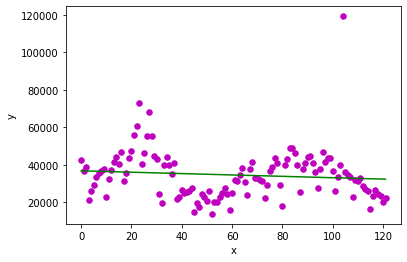

In [37]:
#select a sub-set of the dataset
#reduce the number of days by 200
x = np.arange(0,122)
#selecting data from the last 122 days
y = ddf['UK 1st dose daily'].iloc[::-1].to_numpy()
i=0
while i < 200:
    y = np.delete(y,0,0)
    i += 1
    
#calling the plotting function
main(x, y)

In [38]:
#build an additional array to represent the days that have passed
X = x.reshape(-1, 1)
#select the data you want to predict from the dataset
y = y

#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

#training the alghorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#making predictions
y_pred = regressor.predict(X_test)


#evaluate the results
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8383.100544159774
Mean Squared Error: 105737934.570989
Root Mean Squared Error: 10282.895242634197


# Simple linear regression for 2nd dose of the vaccine

Estimated coefficients:
b_0 = 684483.3770244385            
b_1 = -3383.9691204214314


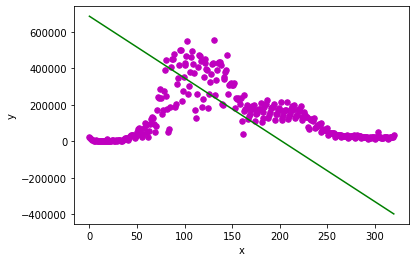

In [39]:
x = np.arange(0,321)
y = ddf['UK 2nd dose daily'].iloc[::-1].to_numpy()
y = np.delete(y,0,0)
main(x, y)

In [40]:
#build an additional array to represent the days that have passed
X = x.reshape(-1, 1)
#select the data you want to predict from the dataset
y = y

#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 0)

#training the alghorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#making predictions
y_pred = regressor.predict(X_test)


#evaluate the results
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 111582.22597109489
Mean Squared Error: 20188313590.928772
Root Mean Squared Error: 142085.58544387523


Estimated coefficients:
b_0 = 155763.61319604394            
b_1 = -1443.0508535428808


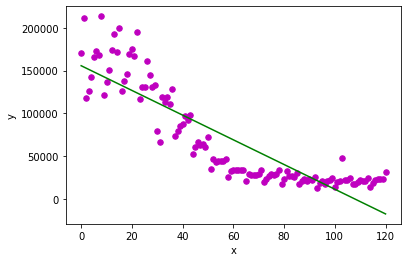

In [41]:
x = np.arange(0,121)
y = ddf['UK 2nd dose daily'].iloc[::-1].to_numpy()
y = np.delete(y,0,0)
i=0
while i < 200:
    y = np.delete(y,0,0)
    i += 1
main(x, y)

In [42]:
#build an additional array to represent the days that have passed
X = x.reshape(-1, 1)
#select the data you want to predict from the dataset
y = y

#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state = 0)

#training the alghorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)


#making predictions
y_pred = regressor.predict(X_test)


#evaluate the results
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 21894.13483972339
Mean Squared Error: 1050821144.8242232
Root Mean Squared Error: 32416.371555499903


# Simple linear regression for 3rd dose of the vaccine

Estimated coefficients:
b_0 = 169702.9590178209            
b_1 = -729.852722833343


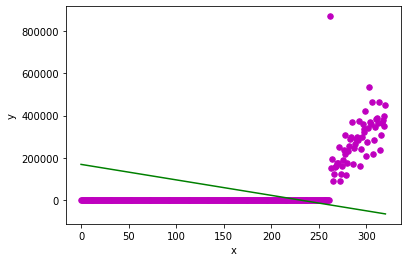

In [43]:
x = np.arange(0,321)
y = ddf['UK Booster/3rd dose daily'].iloc[::-1].to_numpy()
y = np.delete(y,0,0)
main(x, y)

Estimated coefficients:
b_0 = 146864.27995324385            
b_1 = 4599.566704604875


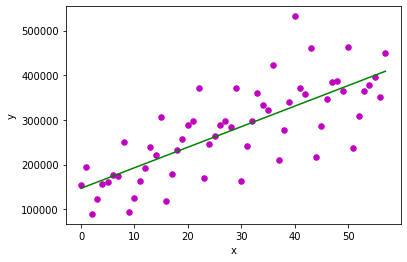

In [44]:
#cut off the period of time
x = np.arange(0,58)
y = ddf['UK Booster/3rd dose daily'].iloc[::-1].to_numpy()
y = np.delete(y,0,0)
i=0
while i < 263:
    y = np.delete(y,0,0)
    i += 1
main(x, y)

In [45]:
#build an additional array to represent the days that have passed
X = x.reshape(-1, 1)
#select the data you want to predict from the dataset
y = y

#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.04, random_state = 0)

#training the alghorithm
regressor = LinearRegression()
regressor.fit(X_train, y_train)


#making predictions
y_pred = regressor.predict(X_test)


#evaluate the results
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 22703.07474730932
Mean Squared Error: 565102949.3354253
Root Mean Squared Error: 23771.894104917792


In [49]:
#calculate the mean for the array used for the "UK 1st dose daily" machine learning model
y = ddf['UK 1st dose daily'].iloc[::-1].to_numpy()
i=0
while i < 200:
    y = np.delete(y,0,0)
    i += 1
y.mean()

34585.81967213115

In [51]:
#calculate the mean for the array used for the "UK 2nd dose daily" machine learning model
y = ddf['UK 2nd dose daily'].iloc[::-1].to_numpy()
y = np.delete(y,0,0)
i=0
while i < 200:
    y = np.delete(y,0,0)
    i += 1
y.mean()

69180.56198347108